<a href="https://colab.research.google.com/github/larasneves/FCED/blob/main/stats_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Fundamentals of Data Science and Engineering </h1>
<h2> Statistics </h2>
Group 6: Helena Costa, José Mayorga, Lara Neves


---






<h2> Introduction </h2>
<h3> Dataset Source </h3>

The Video Game Sales Dataset used in study was sourced from Kaggle (Ibrahim Muhammad Naeem, 2023). This dataset contains information on the sales performance and popularity of various video games worldwide.
It contains 16719 rows and 16 columns, each row representing a video game entry.


<h3> Dataset Details </h3>
The dataset contains information such as game names, the platform they were released on, the release year, genre, and sales across different regions like North America, Europe, Japan, global and others.
Additionally, it includes ratings and reviews from both critics and users, encompassing average critic scores, the count of critics who reviewed the games, average user scores, the count of user reviews, developer and publisher information, and overall game ratings.

<h2> Dataset Retrieval </h2>


<h5> Libraries </h5>

The libraries used were:

* pandas: Used for data manipulation, reading and analyzing datasets.

* matplotlib: Used for creating various types of plots and visualizations, such as histograms and bar charts.

* seaborn: Used for enhancing the quality and aesthetics of data visualizations, often used in conjunction with matplotlib.

* pingouin: Used for conducting statistical tests and analysis, including hypothesis testing and correlation analysis.

* scipy.stats: A submodule of SciPy, used for statistical analysis and hypothesis testing.

* numpy: Used for numerical and mathematical operations, often used in data preprocessing and analysis.

In [ ]:
pip install pingouin

We read the dataset from Github and displayed a sample of five rows.

In [ ]:
# @title

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats
import numpy as np

url='https://raw.githubusercontent.com/larasneves/FCED/main/Video_Games.csv'
dataset = pd.read_csv(url)


In [ ]:

dataset.sample(5, random_state=1000)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
7178,Dino Stalker,PS2,2002.0,Shooter,Capcom,0.07,0.06,0.08,0.02,0.22,50.0,18.0,6.3,8.0,Capcom,M
12656,Dig Dug: Digging Strike,DS,2005.0,Puzzle,Atari,0.05,0.00,0.00,0.00,0.06,65.0,24.0,tbd,NaN,Bullets,E
991,Metroid II: Return of Samus,GB,1991.0,Adventure,Nintendo,0.85,0.31,0.56,0.04,1.76,NaN,NaN,NaN,NaN,NaN,NaN
11721,10 Minute Solution,Wii,2010.0,Sports,Activision,0.06,0.01,0.00,0.01,0.08,NaN,NaN,tbd,NaN,Anchor Bay Entertainment,E
9710,Conception II: Children of the Seven Stars,3DS,2013.0,Role-Playing,Screenlife,0.09,0.00,0.03,0.01,0.12,62.0,11.0,7.7,44.0,Spike,M


In [ ]:
# @title
print(f"Shape of the dataset = {dataset.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(dataset.dtypes)

Shape of the dataset = (16719, 16) 

Data types are below where 'object' indicates a string type: 
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


<h3> Dataset Features </h3>
The features in our dataset are described in the table below.
Some descriptions were corrected since they were mismatched in the original version.

In [ ]:
# @title
from tabulate import tabulate

table = [['Name','Nominal categorical','The name of the video game.'],
         ['Platform','Nominal categorical','The platform on which the game was released, such as PlayStation, Xbox, Nintendo, etc.'],
         ['Year of Release','Numeric','	The year in which the game was released.'],
         ['Genre','Nominal categorical','The genre of the video game, such as action, adventure, sports, etc.'],
         ['Publisher','Nominal categorical','The company responsible for publishing the game.'],
         ['NA Sales','Numeric','The sales of the game in North America.'],
         ['EU Sales','Numeric','The sales of the game in Europe.'],
         ['JP Sales','Numeric','The sales of the game in Japan.'],
         ['Other Sales','Numeric','The sales of the game in other regions.'],
         ['Global Sales','Numeric','The total sales of the game across the world.'],
         ['Critic Score','Numeric','The average score given to the game by professional critics.'],
         ['Critic Count','Numeric','The number of critics who reviewed the game.'],
         ['User Score','Numeric','The average score given to the game by users.'],
         ['User Count','Numeric','The number of users who reviewed the game.'],
         ['Developer','Nominal categorical','The company responsible for developing the game.'],
         ['Rating','Numeric','The rating assigned to the game by organizations such as the ESRB or PEGI.']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════╤═══════════════════════╤════════════════════════════════════════════════════════════════════════════════════════╕
│ Name            │ Nominal categorical   │ The name of the video game.                                                            │
╞═════════════════╪═══════════════════════╪════════════════════════════════════════════════════════════════════════════════════════╡
│ Platform        │ Nominal categorical   │ The platform on which the game was released, such as PlayStation, Xbox, Nintendo, etc. │
├─────────────────┼───────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Year of Release │ Numeric               │ The year in which the game was released.                                               │
├─────────────────┼───────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Genre           │ Nominal categorical   │ The genre of the video ga

<h1> Goals and Objectives </h1>


<h2>General Research Question:</h2>
The main goal of this study is to investigate the factors that most significantly influence the user score of a video game. To accomplish this, we have formulated three specific research questions:

<h3>Specific Research Question 1:</h3>
**Is the User Count different between games developed by popular publishers/developers and those developed by not popular publishers/developers?**
This question aims to explore whether the user count varies depending on the reputation and success of the developer and the publisher, potentially shedding light on user engagement patterns within these groups.

<h3>Specific Research Question 2:</h3>
**Is it the probability of user score greater than 80 for the not popular publisher less than probability user score greater than 80 in the popular publisher?**
This question delves into the relationship between publisher/developer popularity and high user scores, helping us understand if games from renowned publishers/developers tend to receive more favorable user ratings.

<h3>Specific Research Question 3:</h3>
**Is the User Score's mean equal for all the genres?**
By comparing the means of the genres, we seek to identify if all the genres have the same effect on the user scores.


<h2>Variables of Interest:</h2>

In pursuit of these research questions, we selected two numerical variables: User Scores and User Count. Additionally, we considered three categorical variables: genre, developer, and publisher.

Through rigorous analysis of these variables and research questions, we aim to determine the keys of the user score's video game industry, contributing to a deeper understanding of the factors that shape player satisfaction and game success.

NOTE: Please note that in a subsequent section of this report, we establish the definition of 'Popular' as being among the top 25 publishers or developers, determined by their global sales performance.

<h1> Data Cleaning and Preprocessing </h1>

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.
Since we already know how many columns and lines we have, missing values are checked by displaying its number in every column. We decide to drop these observations for simplicity.

In [ ]:
# @title
print(f"\nNumber of missing values for each column:")
print(dataset.isnull().sum())


Number of missing values for each column:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [ ]:
# @title
print('Shape of the dataset before dropping missing values: ' , dataset.shape)
dataset = dataset.dropna()
print('New shape of the dataset: ' , dataset.shape)

Shape of the dataset before dropping missing values:  (16719, 16)
New shape of the dataset:  (6825, 16)


Now, we can see that we no longer have missing values:

In [ ]:
# @title

print(f"\nNumber of missing values for each column:")
print(dataset.isnull().sum())


Number of missing values for each column:
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


As seen previously, the variable User Count is an object. Since that column has no longer null values, we can convert the values to the type *float*. Futhermore, we will multiply the scores given by users by 10 so we have the scores given by users and critics in the same scale (0-100).

In [ ]:
# @title
dataset['User_Score'] = dataset['User_Score'].astype(float).apply(lambda x: x * 10)

Since we are not going to use all of the columns in our project, we can also drop the unused columns.
Futhermore, we are going to convert the column titles into lower case letters in order to follow the good practice and visualize the data.

In [ ]:
# @title
dataset = dataset.drop(columns=["NA_Sales", "EU_Sales",'JP_Sales','Other_Sales','Rating','Year_of_Release','Platform','Name','Critic_Count','Critic_Score'])

In [ ]:
# @title
dataset.columns = dataset.columns.str.lower().str.strip()

Let's visualize our categorical features:

In [ ]:
# @title
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
dataset.describe(include='object').T

,count,unique,top,freq
genre,6825,12,Action,1630
publisher,6825,262,Electronic Arts,944
developer,6825,1289,EA Canada,149


In [ ]:
# @title
print('Unique values for Genre')
print(dataset['genre'].unique())

Unique values for Genre
['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']


Since we have many different unique values for publisher and developer, we decided to group them by 'Popularity'.
We define popularity based on higher global sales.
In order to do that, we grouped the games by publisher, and computed the sum of global sales of every game from that publisher.

Top 30 Publishers (based on global sales)
1: 868.55
2: 849.49
3: 535.74
4: 388.1
5: 350.17
6: 340.23
7: 216.49
8: 162.87
9: 148.42
10: 137.87
11: 118.45
12: 113.32
13: 108.68
14: 107.08
15: 82.71
16: 71.79
17: 70.8
18: 45.01
19: 44.14
20: 42.66
21: 38.94
22: 34.46
23: 33.63
24: 31.71
25: 24.88
26: 19.96
27: 19.63
28: 19.54
29: 16.81
30: 16.4


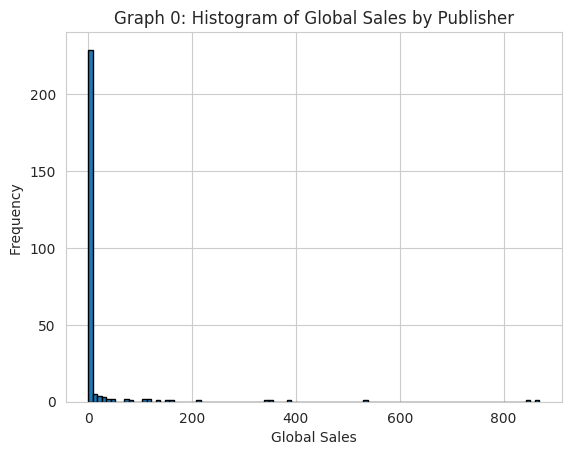

In [ ]:
# @title
publisher_sales = dataset.groupby("publisher")["global_sales"].sum()
publisher_sales = publisher_sales.sort_values(ascending=False)
print('Top 30 Publishers (based on global sales)')
for index, value in enumerate(publisher_sales.head(30)):
    print(f"{index+1}: {round(value,2)}")


plt.hist(publisher_sales, bins=100, edgecolor='k')
plt.title('Graph 0: Histogram of Global Sales by Publisher')
plt.xlabel('Global Sales')
plt.ylabel('Frequency ')
plt.grid(True)
plt.show()

Based on the observation of the histogram and the analysis of the top 30 highest values in our dataset, we have made the decision to label the top 25 values as 'popular'.
 In this context, 'popular' refers to entries where the global sales have exceeded 20 million dollars. This approach was chosen to ensure that the 'popular' category includes the most successful and widely recognized entries within the dataset, while also allowing for a clear and meaningful distinction from the remaining data points.

In [ ]:
# @title
## GROUP PUBLIHSER BY POPULARITY
publisher_sales = dataset.groupby("publisher")["global_sales"].sum()
publisher_sales = publisher_sales.sort_values(ascending=False)

def is_popular(publisher):
    if publisher in popular_publishers:
        return 'popular'
    else:
        return 'not_popular'

popular_publishers = publisher_sales[publisher_sales >= 20].index.tolist()

dataset['publisher_popularity'] = dataset['publisher'].apply(is_popular)

Similarly, for developers, we have established a threshold of 39, motivated by the same rationale as in the case of publishers. This threshold serves as a benchmark for distinguishing the most successful developers within our dataset.

In [ ]:
# @title
## GROUP DEVELOPER BY POPULARITY
import matplotlib.pyplot as plt

developer_sales = dataset.groupby("developer")["global_sales"].sum()
developer_sales = developer_sales.sort_values(ascending=False)


def is_popular(developer):
    if developer in popular_developers:
        return 'popular'
    else:
        return 'not_popular'

popular_developers = developer_sales[developer_sales >= 39].index.tolist()
dataset['developer_popularity'] = dataset['developer'].apply(is_popular)
#len(dataset['developer_popularity'])


Since the variable 'Global Sales' was only used to categorize the publishers and developers, we can now drop it from the table.

In [ ]:
# @title
dataset = dataset.drop(columns=['global_sales'])

Let's visualize our numerical features:

In [ ]:
# @title
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
dataset.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
user_score,6825.0,71.856264,14.399417,5.0,65.0,75.0,82.0,96.0
user_count,6825.0,174.722344,587.428538,4.0,11.0,27.0,89.0,10665.0


In [ ]:
dataset.sample(5, random_state=999)

,genre,publisher,user_score,user_count,developer,publisher_popularity,developer_popularity
16311,Puzzle,Zoo Games,85.0,6.0,Empty Clip Studios,not_popular,not_popular
4125,Racing,Ignition Entertainment,91.0,10.0,Ratbag,not_popular,not_popular
12934,Role-Playing,Idea Factory,78.0,12.0,Idea Factory,not_popular,not_popular
4176,Role-Playing,Microsoft Game Studios,75.0,156.0,FASA Studio,popular,not_popular
2744,Role-Playing,Square Enix,69.0,106.0,Square Enix,popular,popular


<h1> Data Exploration and Visualisation </h1>
Our dataset is now ready to be analysed, and so are we!

<h2> Univariate Visualisation </h2>

<h4> Numerical Variables</h4>

*   User scores
*   User count




<h2>Boxplot & Histograms</h2>

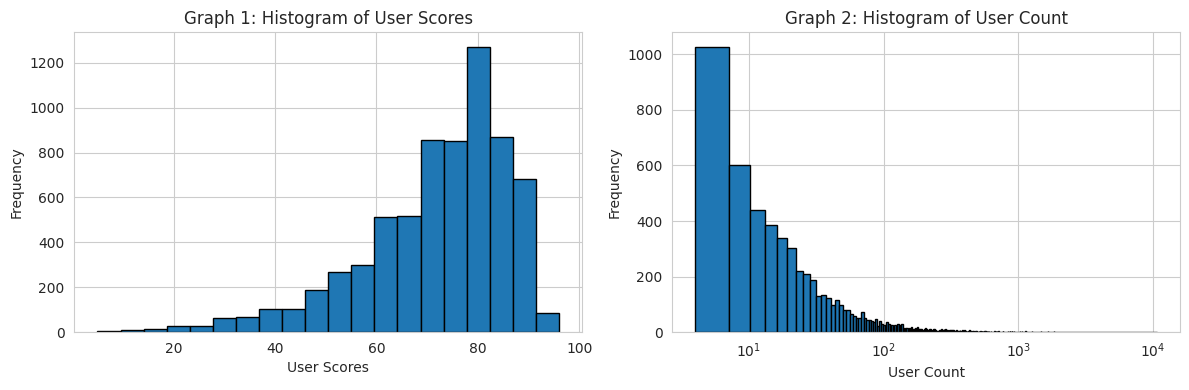

In [ ]:
# @title
user_scores = dataset['user_score']
user_count = dataset['user_count']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(user_scores, density=False, bins=20, edgecolor='black')
plt.xlabel('User Scores')
plt.ylabel('Frequency')
plt.title('Graph 1: Histogram of User Scores')

plt.subplot(1, 2, 2)
plt.hist(user_count, density=False, bins=3500, edgecolor='black')
plt.xlabel('User Count')
plt.xscale('log')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Graph 2: Histogram of User Count')



plt.tight_layout()

We can see in the histograms that the distribution of scores is clearly left-skewed and ranges from 0-100, and is mainly distributed across the 60 to 90 range, despite a noticeable peak around 80.

In the User Count histogram, it is evident that the most common user count falls below 10, indicating a prevalence of games with relatively low player engagement. Conversely, games with a substantial user count, exceeding 10.000 users, are less frequent.

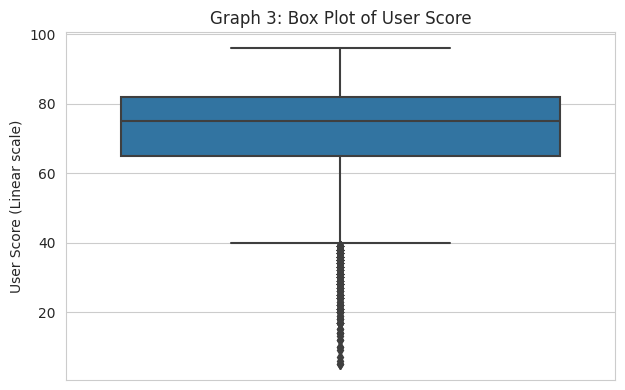

In [ ]:
# @title
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, y='user_score')
plt.title('Graph 3: Box Plot of User Score')
plt.ylabel('User Score (Linear scale)')


plt.tight_layout()

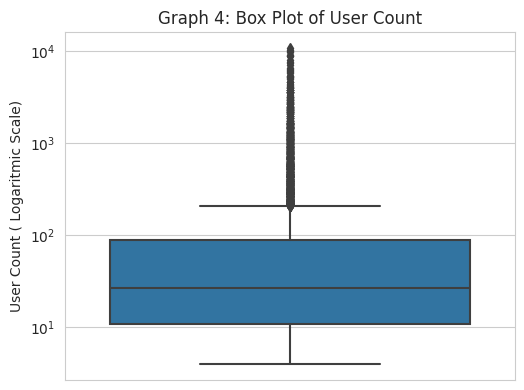

In [ ]:
# @title
plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 2)
sns.boxplot(data=dataset, y='user_count')
plt.title('Graph 4: Box Plot of User Count')
plt.yscale('log')
plt.ylabel('User Count ( Logaritmic Scale)')


plt.tight_layout()


In our boxplots, we provided a visual representation of the numerical features, User Scores, and User Counts, revealing essential statistical components such as whiskers, median, quartiles, and outliers. Notably, for User Counts, we have opted to apply a logarithmic scale on the y-axis. This choice was made to accommodate the substantial variation in the number of evaluators across different games. By using this scale, we can effectively visualize games with a wide-ranging count of evaluations, spanning from a few to a multitude.

With respect to User Scores, it is evident that the median, as observed in the histogram, hovers around 80. Simultaneously, the median for User Counts is approximately 200.

The presence of outliers in User Scores highlights the existence of games with lower scores, signifying that only a small number of titles receive such ratings. Similarly, the outliers in User Counts underscore the scarcity of games with an exceptionally large player count.


<h4> Categorical Variables </h4>

* Genre
* Developer
* Publisher



In [ ]:
# @title
genre = dataset['genre']
developer = dataset['developer']
publisher = dataset['publisher']

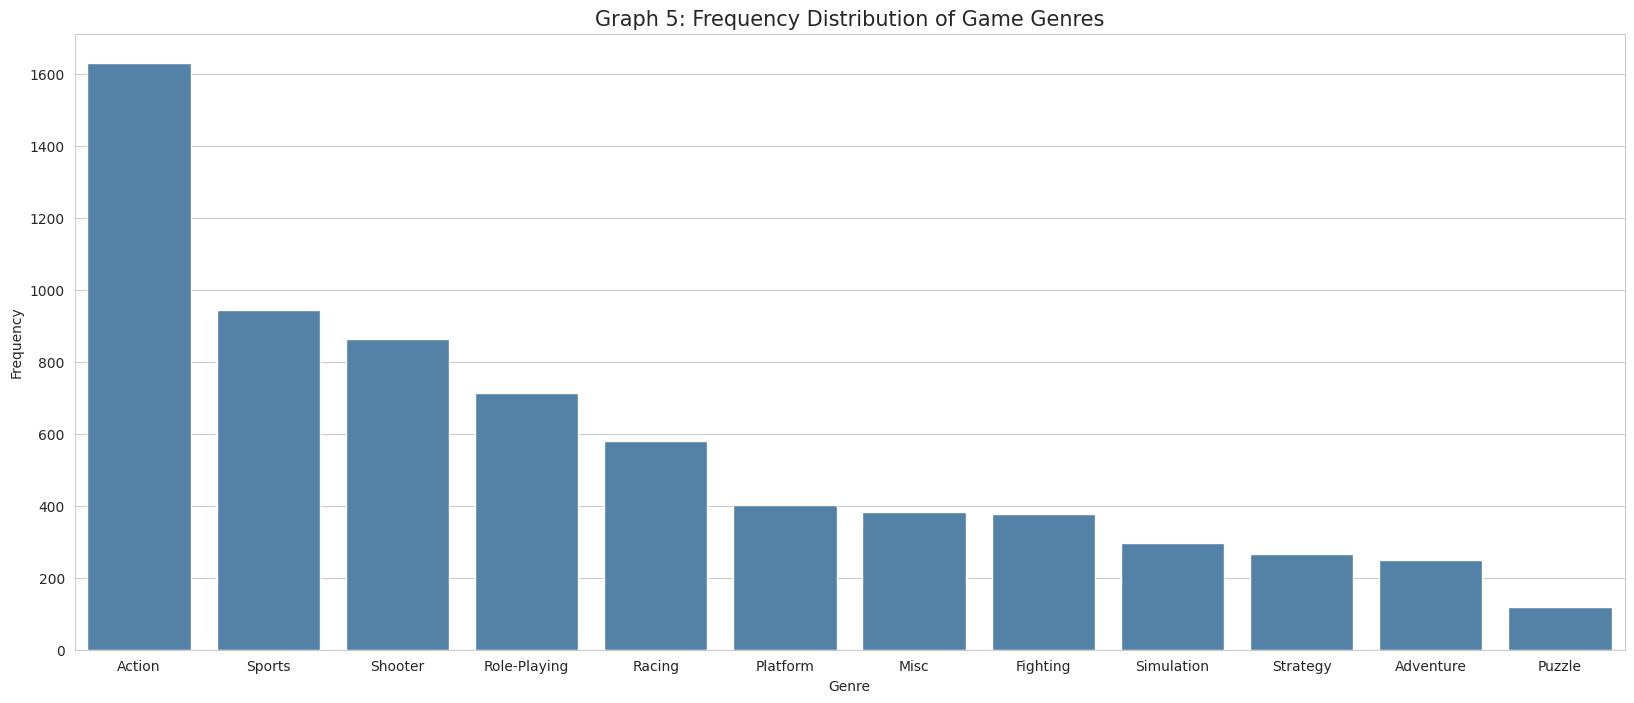

In [ ]:
# @title
plt.figure(figsize = (20,8))
fig = sns.countplot(x= 'genre', data= dataset, color = 'steelblue',order= genre.value_counts().index)
fig = plt.title('Graph 5: Frequency Distribution of Game Genres', fontsize = 15)
plt.ylabel('Frequency')
plt.xlabel('Genre')


plt.show()

In our histogram representing the 'Genre' category, we've organized the genres in descending order based on their frequency or count. This arrangement allows us to visualize the distribution of game genres according to how frequently they appear in our dataset.

The histogram vividly illustrates the popularity of various genres within the video game industry. Genres that appear frequently occupy the left side of the histogram, indicating their prevalence in the market, like 'Action', 'Sports' or 'Shooter'.

On the right side, less common genres are displayed, showcasing their relative scarcity, like 'Puzzle', 'Adventure' and 'Strategy'.

This ordered presentation offers a clear picture of which genres dominate the industry and these insights are crucial for understanding market trends and preferences among gamers.

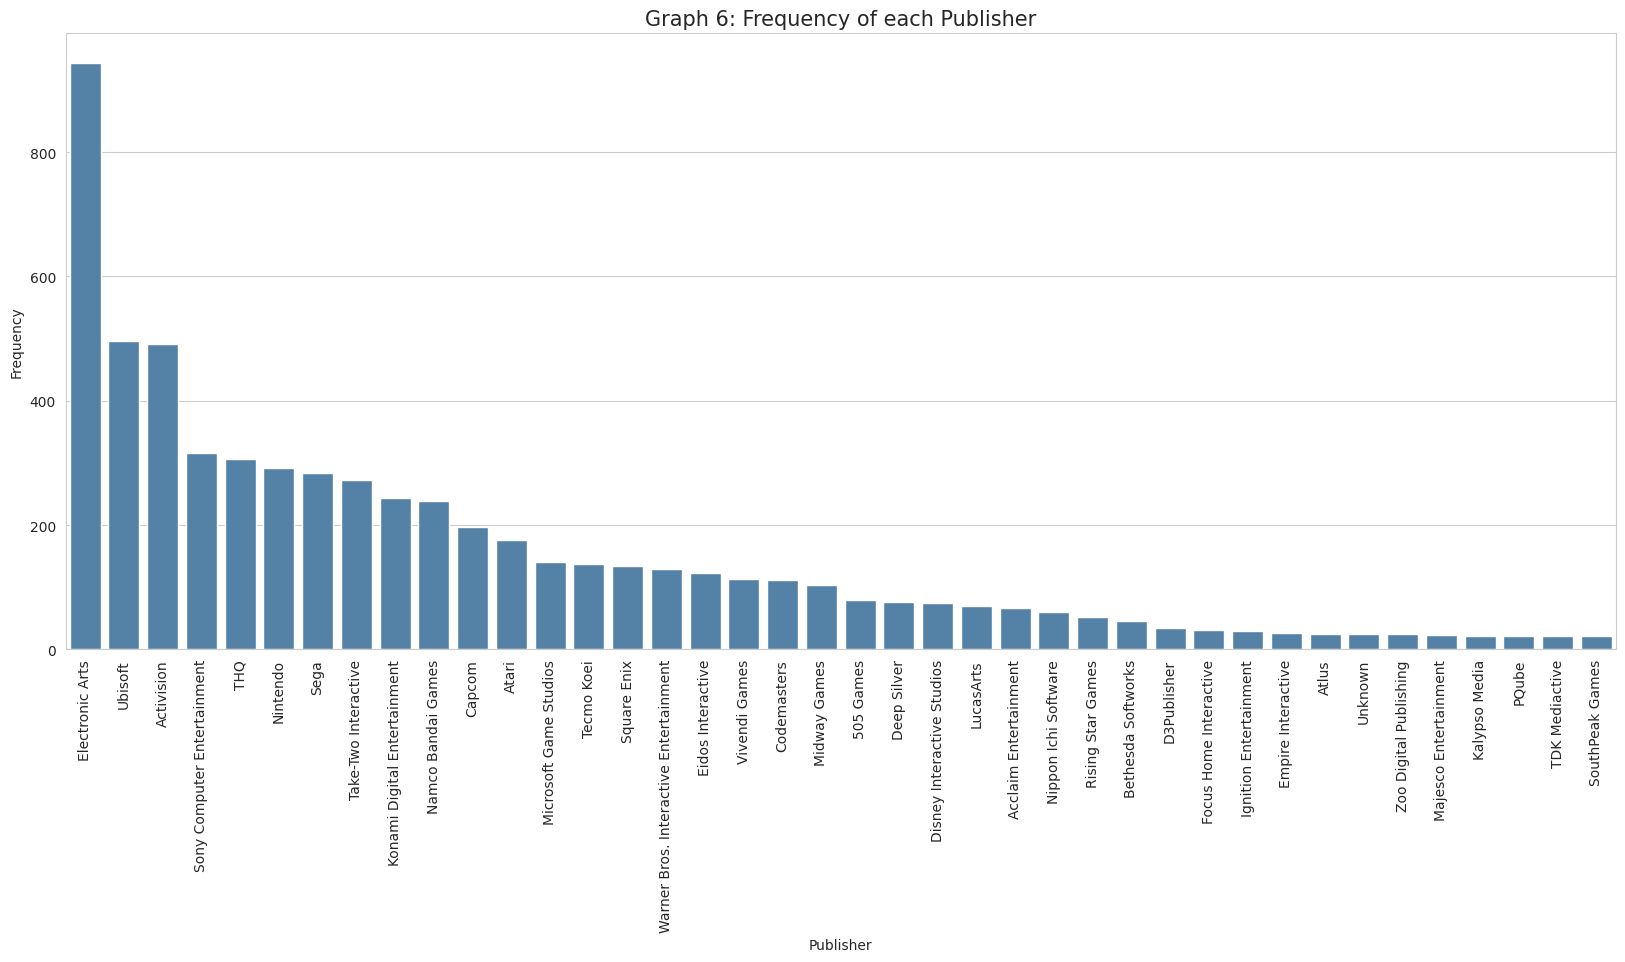

In [ ]:
# @title
publisher_counts = dataset['publisher'].value_counts()
filtered_publishers = publisher_counts[publisher_counts > 20]
filtered_dataset = dataset[dataset['publisher'].isin(filtered_publishers.index)]

plt.figure(figsize = (20,8))
fig = sns.countplot(x= 'publisher', data= dataset, color = 'steelblue', order=filtered_publishers.index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig = plt.title('Graph 6: Frequency of each Publisher', fontsize = 15)
plt.ylabel('Frequency')
plt.xlabel('Publisher')

plt.show()

The plot showcases a diverse array of publishers, each contributing a distinct number of titles to the dataset. Notably, this distribution is not uniform, emphasizing the prevalence of certain publishers in the market. These findings set the stage for further investigations into the characteristics and performance of games associated with these publishers, allowing us to explore the factors that contribute to their prominence in the market.

It's important to note that, due to the extensive diversity of publishers in our dataset, we have focused our analysis on those publishers with a significant presence. Specifically, we have plotted publishers responsible for more than 20 games, allowing us to concentrate on key players in the industry.

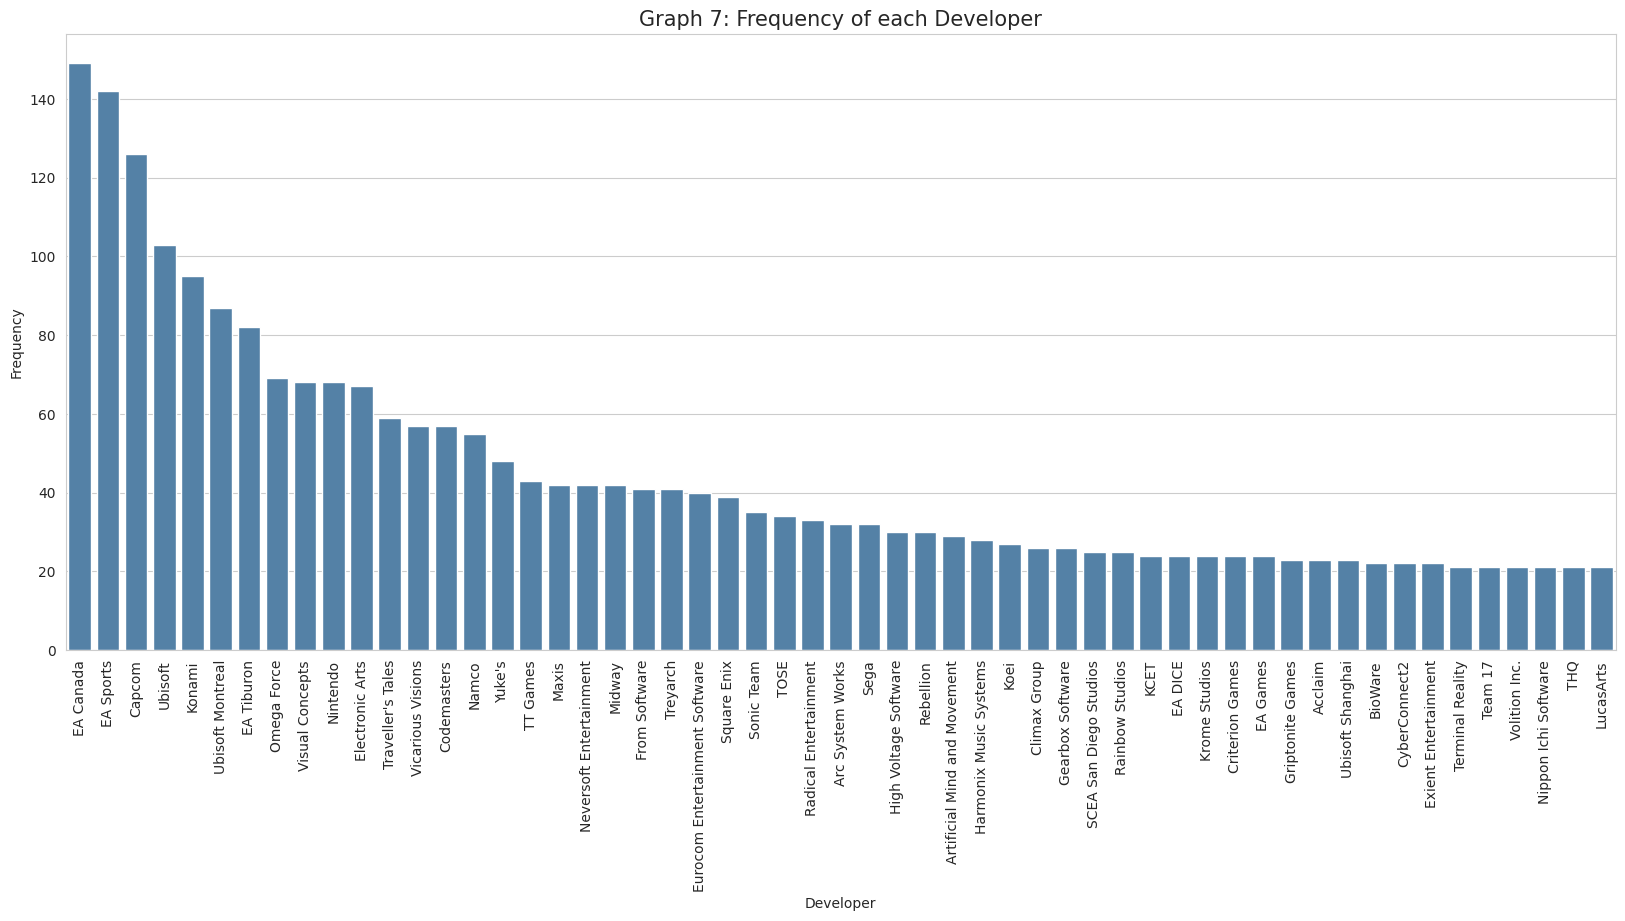

In [ ]:
# @title
developer_counts = dataset['developer'].value_counts()
filtered_developer = developer_counts[developer_counts > 20]
filtered_dataset = dataset[dataset['developer'].isin(filtered_developer.index)]

plt.figure(figsize = (20,8))
fig = sns.countplot(x= 'developer', data= dataset, color = 'steelblue', order=filtered_developer.index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig = plt.title('Graph 7: Frequency of each Developer', fontsize = 15)
plt.ylabel('Frequency')
plt.xlabel('Developer')

plt.show()

The resulting plot for the Developers showcases a diverse array of several developers.
It's worth highlighting that, given the substantial number of developers in our dataset, we have chosen to focus our analysis on those developers with a substantial presence. Specifically, we have plotted developers who have also contributed to more than 20 games, enabling us to spotlight influential developers in the field.

<h2>Two-Variable Visualization</h2>

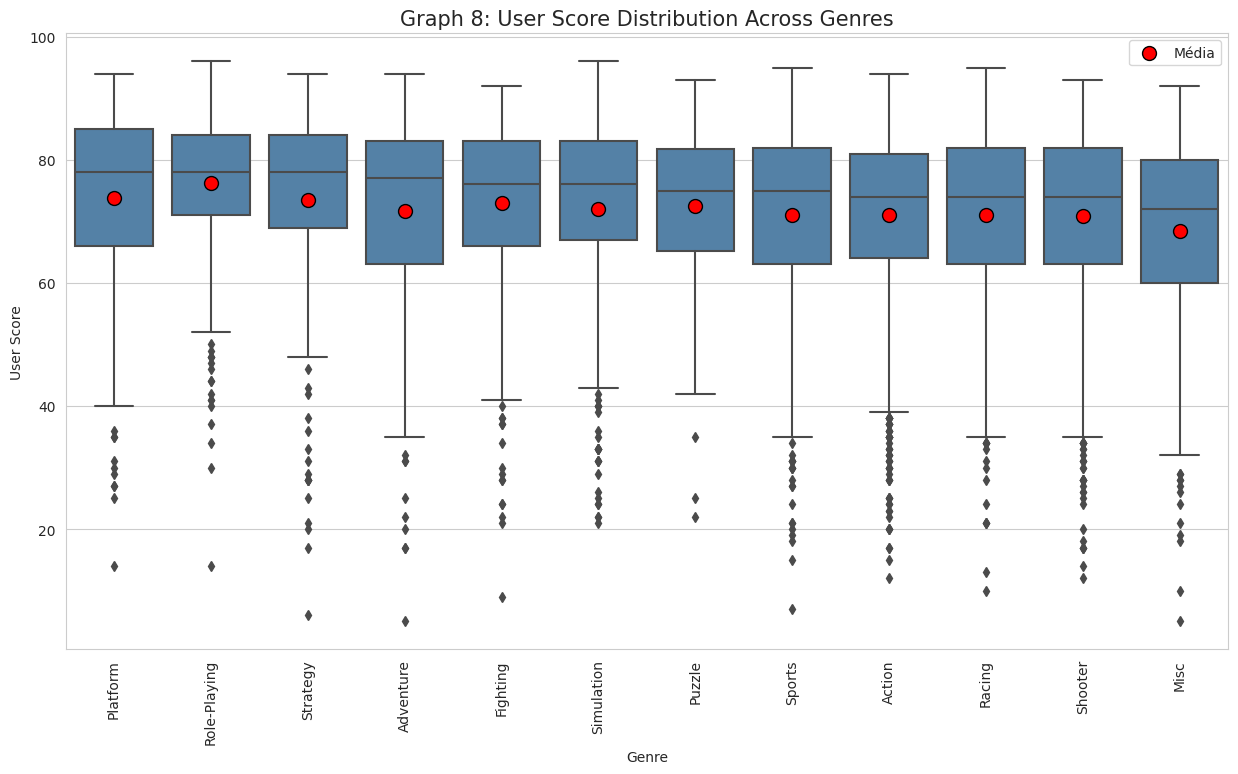

In [ ]:
# @title
median_order = dataset.groupby('genre')['user_score'].median().sort_values(ascending=False).index
dataset['genre'] = pd.Categorical(dataset['genre'], categories=median_order, ordered=True)
dataset.sort_values('genre', inplace=True)

sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
sns.boxplot(x='genre', y='user_score', data=dataset, color='steelblue')

# Calcule as médias para cada categoria
means = dataset.groupby('genre')['user_score'].mean()

# Adicione pontos representando as médias
for x, mean in enumerate(means):
    plt.scatter(x, mean, color='red', s=100, marker='o', edgecolor='black', label='Média' if x == 0 else '')

plt.title('Graph 8: User Score Distribution Across Genres', fontsize=15)
plt.xlabel('Genre')
plt.ylabel('User Score')
plt.xticks(rotation=90)

# Adicione uma legenda para a linha da média
plt.legend(loc='upper right', frameon=True)

plt.show()
plt.show()


As we've previously identified the top genres, this visualization delves deeper into the distribution of user scores within these genres. This visualization enables us to not only identify the top-performing genres but also understand the variation in user satisfaction within these genres.

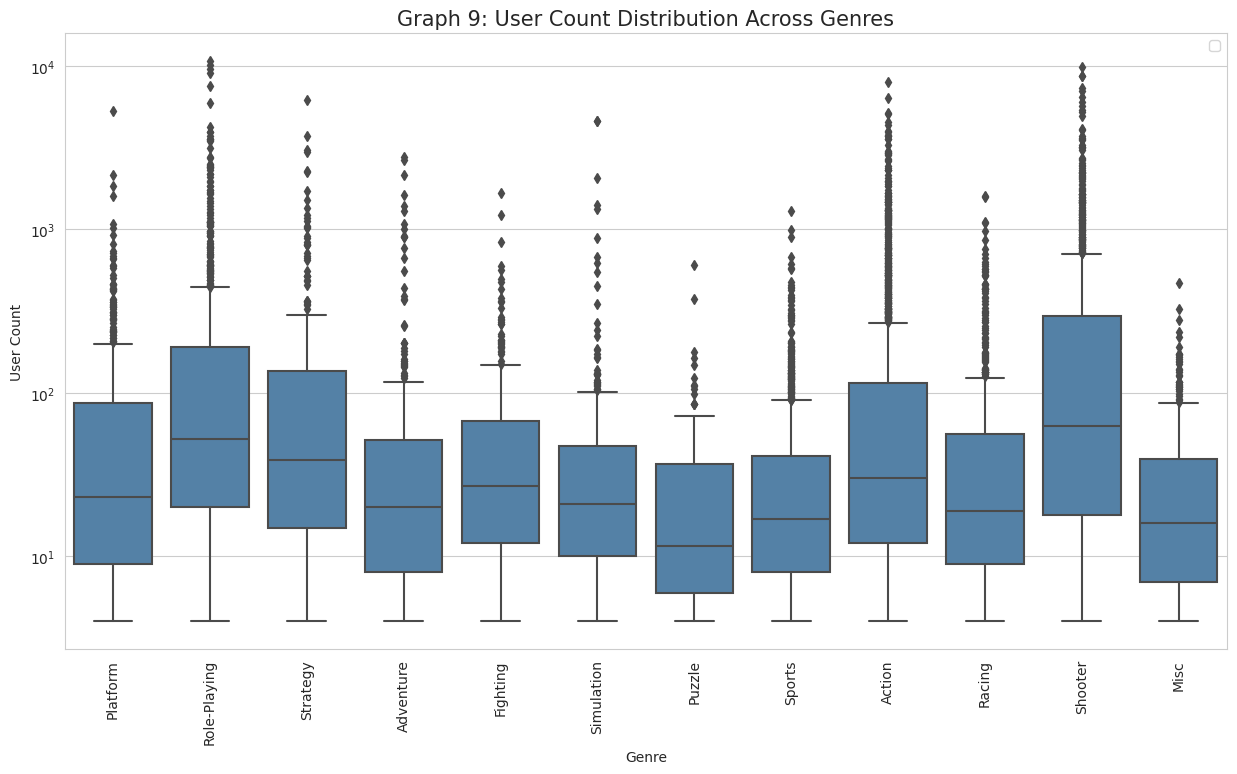

In [ ]:
# @title
import math

from math import exp, expm1

median_order = dataset.groupby('genre')['user_count'].median().sort_values(ascending=False).index
dataset['genre'] = pd.Categorical(dataset['genre'], categories=median_order, ordered=True)
dataset.sort_values('genre', inplace=True)

sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
sns.boxplot(x='genre', y='user_count', data=dataset, color='steelblue')


plt.title('Graph 9: User Count Distribution Across Genres', fontsize=15)
plt.xlabel('Genre')
plt.ylabel('User Count')
plt.yscale('log')

# Calcule as médias para cada categoria
#means = dataset.groupby('genre')['user_count'].mean()

# Adicione pontos representando as médias
#for x, mean in enumerate(means):
  #  plt.scatter(x,  math.log(mean, 10), color='red', s=100, marker='o', edgecolor='black', label='Média' if x == 0 else '')


plt.xticks(rotation=90)

# Adicione uma legenda para a linha da média
plt.legend(loc='upper right', frameon=True)

plt.show()
plt.show()



As we've previously identified the top genres, this visualization delves deeper into the distribution of the user count within these genres. This visualization enables us to not only identify the top-performing genres but also understand the variation in user count within these genres.

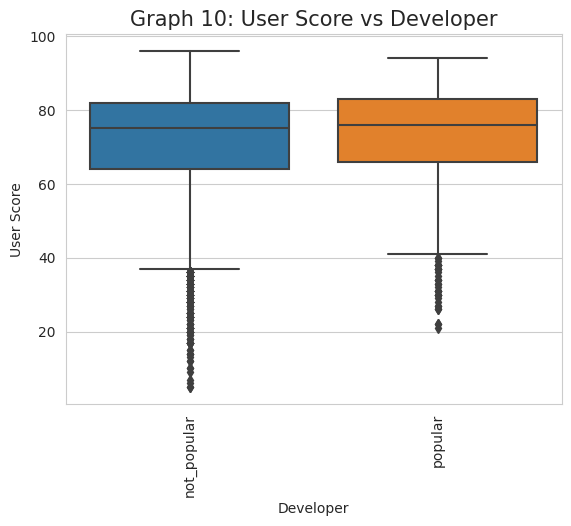

In [ ]:
# @title
sns.boxplot(x='developer_popularity', y='user_score', data=dataset)
plt.title('Graph 10: User Score vs Developer', fontsize=15)

plt.xlabel('Developer')
plt.ylabel('User Score')
plt.xticks(rotation=90)

plt.show();

With this chart we can compare the popularity of the developers with the score of the users. We can see that the mean of the user score of the popular developers is higher than the not popular, which is not surprising. It was also expected that the not popular developers would have more 'negative' outliers.

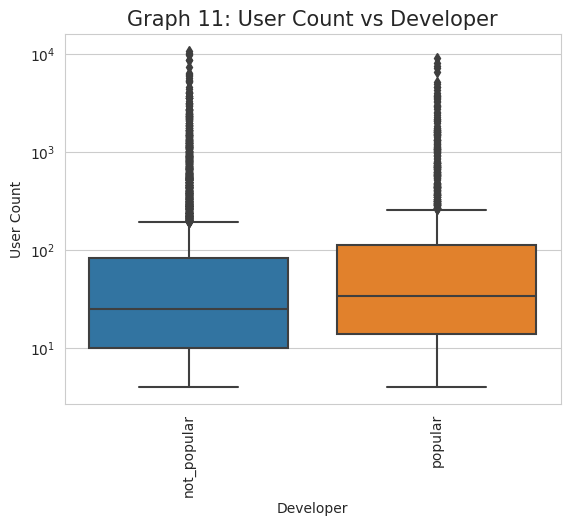

In [ ]:
# @title
sns.boxplot(x='developer_popularity', y='user_count', data=dataset)
plt.title('Graph 11: User Count vs Developer', fontsize=15)
plt.yscale('log')


plt.xlabel('Developer')
plt.ylabel('User Count')
plt.xticks(rotation=90)

plt.show();

With this chart we can compare the popularity of the developers with the user count. We would expect that more people would want to play the games of the more popular developers and that is what the result shows us. Although the lenght of the boxes is quite similar, the popular one has a higher median.

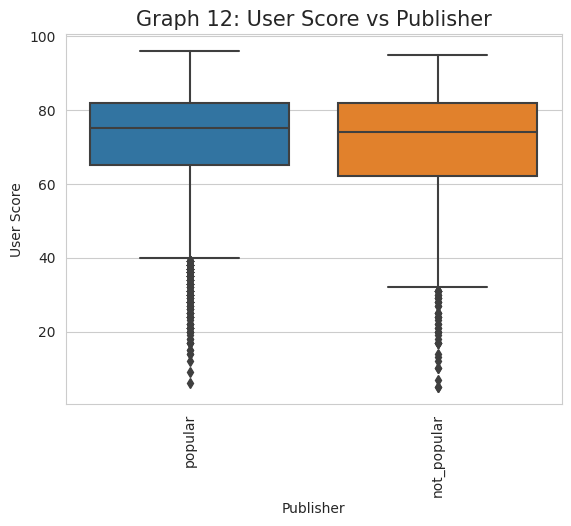

In [ ]:
# @title
sns.boxplot(x='publisher_popularity', y='user_score', data=dataset)
plt.title('Graph 12: User Score vs Publisher', fontsize=15)
plt.xlabel('Publisher')
plt.ylabel('User Score')
plt.xticks(rotation=90)

plt.show();

With this chart we can compare the popularity of the Publishers with the user score. We would expect that users rated higher the games from popular publishers, but apparently not. The medians are quite similar.

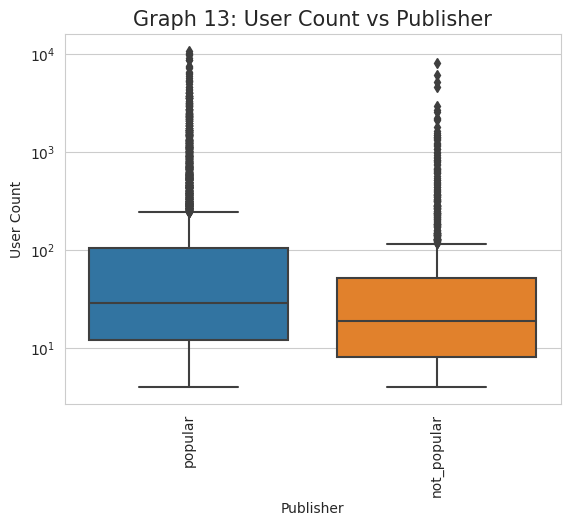

In [ ]:
# @title
sns.boxplot(x='publisher_popularity', y='user_count', data=dataset)
plt.yscale('log')
plt.title('Graph 13: User Count vs Publisher', fontsize=15)
plt.xlabel('Publisher')
plt.ylabel('User Count')
plt.xticks(rotation=90)

plt.show();

For the boxplot of user counts vs Publisher (popular and not popular), the observation that the values of median and quartiles for 'popular' are higher, indicates that games associated with popular publishers tend to have more user counts compared to games from not popular publishers, even though the outliers are similar in both: meaning that there are games from both categories played by a really big amount of players.


<h2>Three-Variable Visualization</h2>

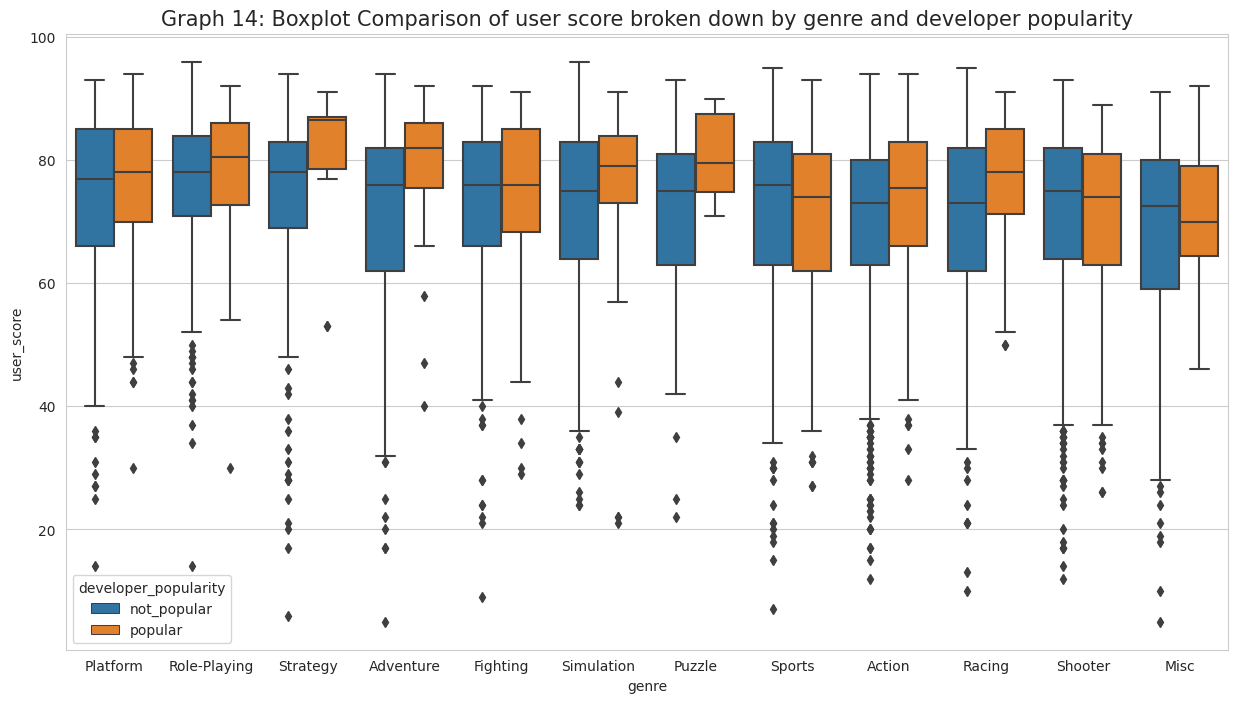

In [ ]:
# @title
reference_median = dataset['user_score'].median()
median_difference_by_genre = dataset.groupby('genre')['user_score'].median() - reference_median
sorted_genres = median_difference_by_genre.abs().sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, x='genre', y='user_score', hue='developer_popularity')
plt.title('Graph 14: Boxplot Comparison of user score broken down by genre and developer popularity', fontsize=15)

plt.show()


In this boxplot we can see that, for most genres, the median of the popular developer is bigger than the not popular which suggests a tendency to the user score to be higher in the popular developers.

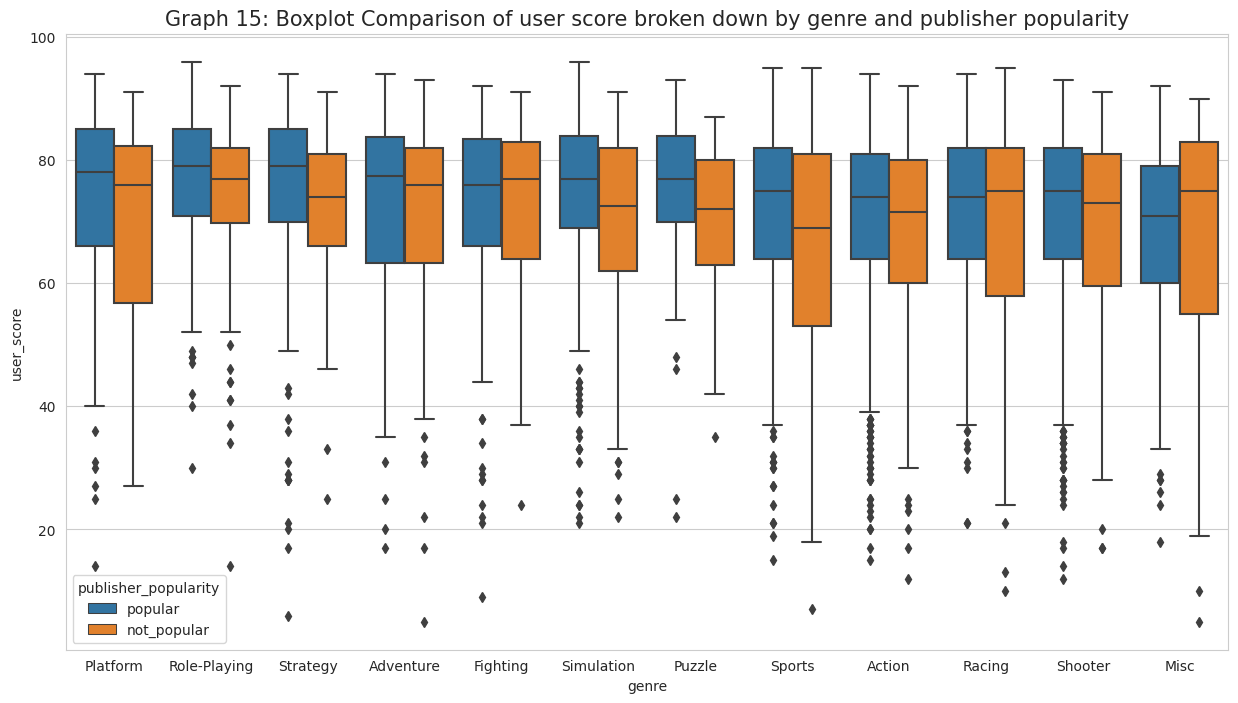

In [ ]:
# @title
median_user_score_by_genre = dataset.groupby('genre')['user_score'].median()

sorted_genres_by_median = median_user_score_by_genre.abs().sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, x='genre', y='user_score', hue='publisher_popularity', order=sorted_genres_by_median)
plt.title('Graph 15: Boxplot Comparison of user score broken down by genre and publisher popularity', fontsize=15)

plt.show()

In this boxplot we can see that, for most genres, the median of the popular publisher is bigger than the not popular which suggests a tendency to the user score to be higher in the popular publishers.

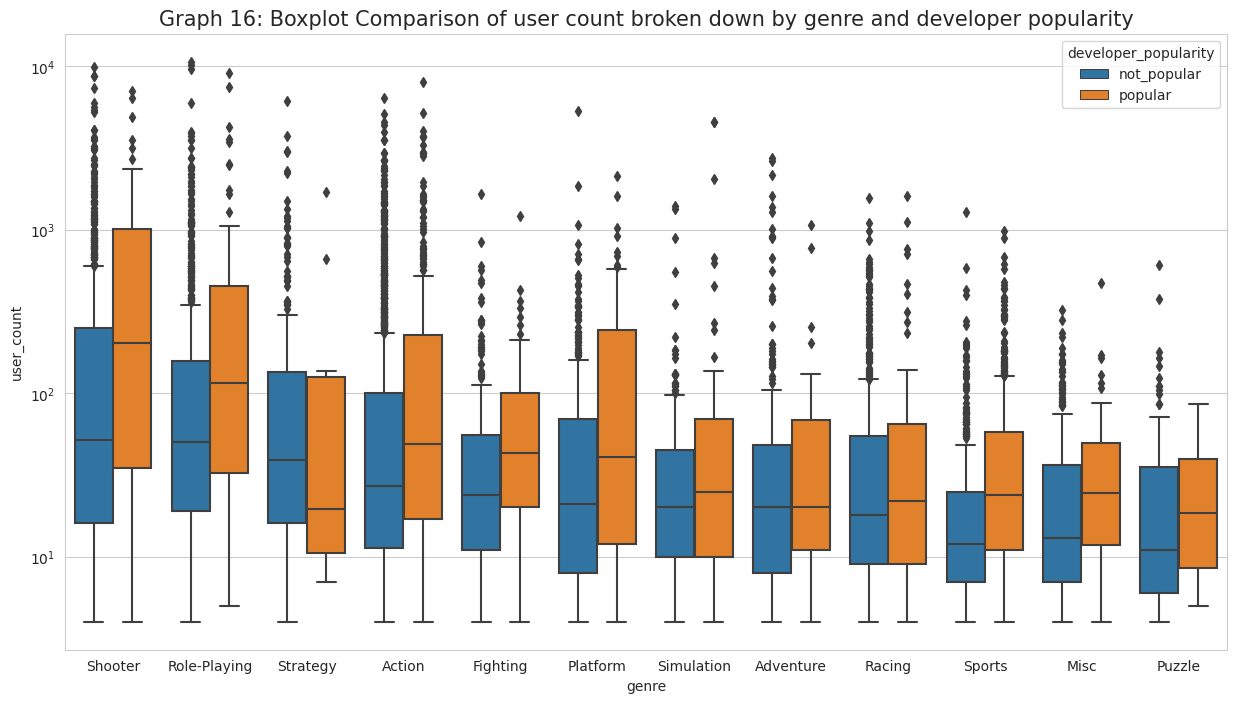

In [ ]:
# @title
median_user_count_by_genre = dataset.groupby('genre')['user_count'].median()

sorted_genres_by_median = median_user_count_by_genre.sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, x='genre', y='user_count', hue='developer_popularity', order=sorted_genres_by_median)
plt.yscale('log')
plt.title('Graph 16: Boxplot Comparison of user count broken down by genre and developer popularity', fontsize=15)

plt.show()


In this boxplot we can see that, for most genres, the median of the popular developer is bigger than the not popular which suggests a tendency to the user count to be higher in the popular developers.

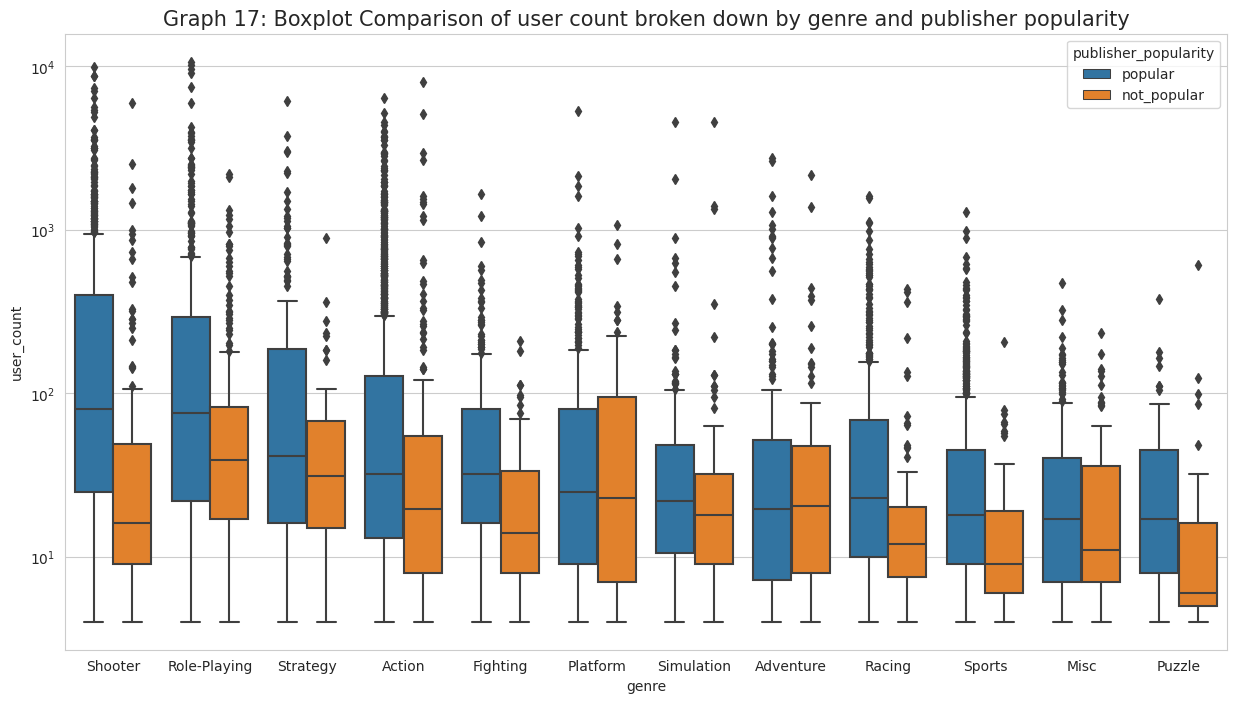

In [ ]:
# @title
median_user_count_by_genre = dataset.groupby('genre')['user_count'].median()

sorted_genres_by_median = median_user_count_by_genre.sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, x='genre', y='user_count', hue='publisher_popularity', order=sorted_genres_by_median)
plt.yscale('log')
plt.title('Graph 17: Boxplot Comparison of user count broken down by genre and publisher popularity', fontsize=15)

plt.show()


In this boxplot we can see that, for all genres, the median of the popular publisher is bigger than the not popular which suggests a tendency to the user count to be higher in the popular publishers.

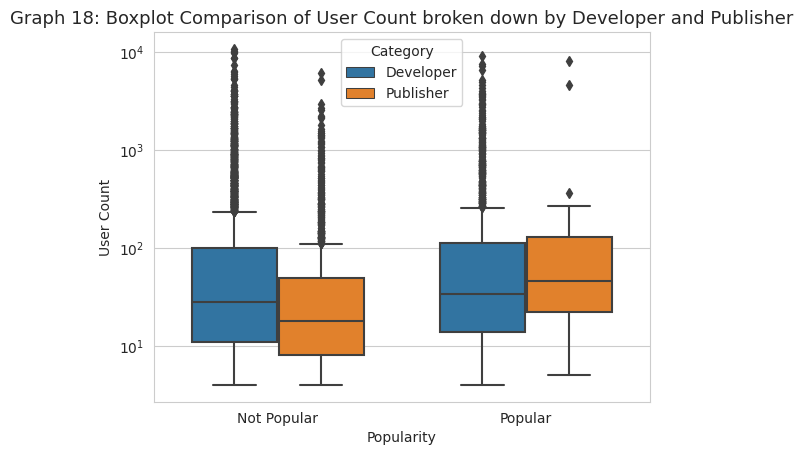

In [ ]:
# @title
sns.boxplot(data=dataset, x='developer_popularity', y='user_count', hue='publisher_popularity', width=0.7)
plt.yscale('log')
plt.title('Graph 18: Boxplot Comparison of User Count broken down by Developer and Publisher', fontsize=13)
plt.xlabel('Popularity')
plt.ylabel('User Count')
plt.xticks([0, 1], ['Not Popular', 'Popular'])

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Developer', 'Publisher'], title='Category')


plt.show()



In this boxplot we can see that, the user count in the not popular developers is higher than the one in the not popular publishers. Which indicates that people care more about the making of the game.

On the other side, the median of the popular publishers's user count is higher than the popular developers which means that, when popular, the players prefer the brand that launchs the game.

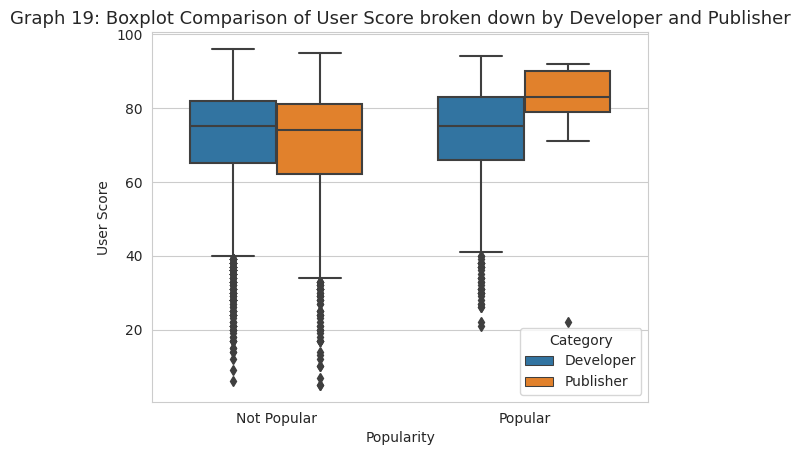

In [ ]:
# @title
sns.boxplot(data=dataset, x='developer_popularity', y='user_score', hue='publisher_popularity', width=0.7)
plt.title('Graph 19: Boxplot Comparison of User Score broken down by Developer and Publisher', fontsize=13)
plt.xlabel('Popularity')
plt.ylabel('User Score')
plt.xticks([0, 1], ['Not Popular', 'Popular'])

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Developer', 'Publisher'], title='Category')

plt.show()

In this boxplot we can see that, the user score in the not popular developers is almost equal than the one in the not popular publishers. Which indicates that people have the same appreciation for both categories.

On the other side, the median of the popular publishers's user score is higher than the popular developers which means that, when popular, the players consider the publisher's quality better than the developer's.

<h1> Hypothesis tests </h1>


<h2> Q1 </h2>
The first specific question is:

**Is User Count different between popular and not popular Publishers and Developers?**


H0: mean_user_count_popular = mean_user_count_not_ popular

VS

H1: mean_user_count_popular != mean_user_count_not_ popular

From the graphic number 11, we expect the user count from popular developers to be higher than the not popular developers. Let's see if there are evidences to confirm that, by performing a T-Test.

In [ ]:
# @title
score_popular = dataset.loc[dataset.developer_popularity == 'popular', 'user_count']
#print(len(score_popular))
score_notpopular = dataset.loc[dataset.developer_popularity == 'not_popular', 'user_count']
#print(len(score_notpopular))

pg.ttest(x=score_popular, y=score_notpopular, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.282032,6823,two-sided,0.001036,"[22.88, 90.75]",0.096783,7.095,0.90685


According to the t-test conducted with a p-value less than 0.05, there is sufficient evidence to reject the null hypothesis, and it is concluded that user count is different for popular developers and for non-popular developers. The confidence interval supports this argument: [22.88, 90.75].

Let's do a manual z-test just to confirm the value obtained with the previous T-test:

In [ ]:
# @title
mean_popular = np.mean(score_popular)
std_dev_popular = np.std(score_popular)
mean_not_popular = np.mean(score_notpopular)
std_dev_not_popular = np.std(score_notpopular)

mean_difference = mean_popular - mean_not_popular
n_popular = len(score_popular)
n_not_popular = len(score_notpopular)
se_difference = np.sqrt((std_dev_popular**2 / n_popular) + (std_dev_not_popular**2 / n_not_popular))
z = mean_difference / se_difference
alpha = 0.05
p_value = 2*(1 - stats.norm.cdf(z))

print('p_value = ',p_value)

p_value =  0.003293619073572618


This p_value confirms the t-test.

And for the publishers we did the same t-test.

In [ ]:
# @title
score_popular = dataset.loc[dataset.publisher_popularity == 'popular', 'user_count']
score_notpopular = dataset.loc[dataset.publisher_popularity == 'not_popular', 'user_count']

pg.ttest(x=score_popular, y=score_notpopular, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.084102,6823,two-sided,3.792048e-07,"[56.55, 127.52]",0.156952,1.329e+04,0.999106


According to the t-test conducted with a p-value less than 0.05, there is sufficient evidence to reject the null hypothesis, and it is concluded that user count is different for popular publishers and for non-popular publishers. The confidence interval supports this argument: [56.55, 127.52].

<h2> Q2 </h2>

The second specific question is:

**Is it the probability of user score greater than 80 for the not popular publisher less than probability user score greater than 80 in the popular publisher?**



H0: P(user_score_popular_publisher/developer > 80 ) = P(user_score_not_popular_publisher/developer > 80 )

VS

H1: P(user_score_popular_publisher/developer > 80 ) > P(user_score_not_popular_publisher/developer > 80 )

In the graphic 12, the boxplot of the scores of the games from popular publishers is similar to the one from not popular. From that, it is interesting to explore if there's relevant diferences or not.


In [ ]:
# @title
filtered_data_popular = dataset[(dataset['user_score'] >= 0) & (dataset['publisher_popularity'] == 'popular')]
user_score_popular = filtered_data_popular['user_score']

filtered_data_notpopular  = dataset[(dataset['user_score'] >= 0) & (dataset['publisher_popularity'] == 'not_popular')]
user_score_notpopular = filtered_data_notpopular['user_score']

prop_popular = sum(score > 80 for score in user_score_popular) / len(user_score_popular)
prop_not_popular = sum(score > 80 for score in user_score_notpopular) / len(user_score_notpopular)

diff_props = prop_popular - prop_not_popular
variance = (prop_popular * (1 - prop_popular) / len(user_score_popular)) + (prop_not_popular * (1 - prop_not_popular) / len(user_score_notpopular))
z = diff_props / np.sqrt(variance)
p_value = 1 - stats.norm.cdf(z)
z_critical = stats.norm.ppf(1-alpha)
print('The number of populars is: ', len(filtered_data_popular) ,';' , 'the number of not populars is: ', len(filtered_data_notpopular))
#print(len(filtered_data_popular) +len(filtered_data_notpopular))

print("p-value:", p_value)


The number of populars is:  5530 ; the number of not populars is:  1295
p-value: 0.028038838419013334


According to the z-test conducted, we obtained a p-value of 0.028, so we reject the null hypothesis.
We can assume with confidence of 95% that the probability of having the user score above 80 for not popular **publishers** is indeed **lower** than for non-popular publishers (alternative hypothesis).

If we do the same but for the developers, surprisingly we don't get the same conclusion:

In [ ]:
# @title
filtered_data_popular = dataset[(dataset['user_score'] >= 0) & (dataset['developer_popularity'] == 'popular')]
user_score_popular = filtered_data_popular['user_score']

filtered_data_notpopular  = dataset[(dataset['user_score'] >= 0) & (dataset['developer_popularity'] == 'not_popular')]
user_score_notpopular = filtered_data_notpopular['user_score']

prop_popular = sum(score > 80 for score in user_score_popular) / len(user_score_popular)
prop_not_popular = sum(score > 80 for score in user_score_notpopular) / len(user_score_notpopular)

diff_props = prop_popular - prop_not_popular
variance = (prop_popular * (1 - prop_popular) / len(user_score_popular)) + (prop_not_popular * (1 - prop_not_popular) / len(user_score_notpopular))
z = diff_props / np.sqrt(variance)
p_value = 1 - stats.norm.cdf(z)
z_critical = stats.norm.ppf(1-alpha)

print('The number of populars is: ', len(filtered_data_popular) ,';' , 'the number of not populars is: ', len(filtered_data_notpopular))
#print(len(filtered_data_popular) +len(filtered_data_notpopular))

print("p-value:", p_value)

The number of populars is:  1464 ; the number of not populars is:  5361
p-value: 0.07188612126521954


As we can see the number of not popular developers it's almost the same as the popular publishers. This will affect the probabilities and, consequently, the p_value.
By this way, we **can't conclude** about the scores for the **developers**, like we did for the publishers.

<h2> Q3 </h2>

The third specific question is the following:

**Is the mean User Score  the same for all the genres?**


H0: mean_user_score_Platform = mean_user_score_Role-Playing = mean_user_score_Strategy

VS

H1: At least one of the means is different

From the plot number 8, we see that the three genres with higher user scores have really similar medians. Inspired on this observation, we formulated this research question in order to verify the similarity in the mean.


In [ ]:
# @title
pg.normality(data=dataset, dv='user_score', group='genre')

,W,pval,normal
genre,,,
Platform,0.898061,9.108652e-16,False
Role-Playing,0.930923,1.328908e-17,False
Strategy,0.850272,2.225222e-15,False
Adventure,0.877536,3.133989e-13,False
Fighting,0.882467,2.127083e-16,False
Simulation,0.871785,5.005213e-15,False
Puzzle,0.917410,2.032265e-06,False
Sports,0.930691,1.781543e-20,False
Action,0.929425,4.752332e-27,False


The populations are not Normal so we can't do an ANOVA test. As an alternative, we are going to do a **Kruskal Wallis** test assuming that the groups are independent.

In [ ]:
# @title
import pandas as pd
from scipy.stats import kruskal

pop1 = dataset[dataset['genre']=='Platform']
pop1=pop1['user_score']
pop2 = dataset[dataset['genre']=='Role-Playing']
pop2=pop2['user_score']
pop3= dataset[dataset['genre']=='Strategy']
pop3=pop3['user_score']
pop4 = dataset[dataset['genre']=='Adventure']
pop4=pop4['user_score']
pop5 = dataset[dataset['genre']=='Fighting']
pop5=pop5['user_score']
pop6 = dataset[dataset['genre']=='Simulation']
pop6=pop6['user_score']
pop7 = dataset[dataset['genre']=='Puzzle']
pop7=pop7['user_score']
pop8 = dataset[dataset['genre']=='Sports']
pop8=pop8['user_score']
pop9 = dataset[dataset['genre']=='Action']
pop9=pop9['user_score']
pop10 = dataset[dataset['genre']=='Racing']
pop10=pop10['user_score']
pop11 = dataset[dataset['genre']=='Shooter']
pop11=pop11['user_score']
pop12 = dataset[dataset['genre']=='Misc']
pop12=pop12['user_score']


#data = dataset.DataFrame(
 # Genre = rep(c("Platform", "Role-Playing", "Strategy", "Adventure","Fighting", "Simulation", "Puzzle", "Sports", "Action", "Racing", "Shooter", "Misc"),
  #            times = c(length(pop1), length(pop2), length(pop3), length(pop4), length(pop5), length(pop6), length(pop7), length(pop8),
   #                     length(pop9), length(pop10), length(pop11), length(pop12)),
  #User_Score = c(pop1, pop2, pop3, pop4, pop5, pop6, pop7, pop8, pop9, pop10, pop11, pop12)
#))

# Realize o teste de Kruskal-Wallis
kruskal_result = kruskal(pop1, pop2, pop3, pop4, pop5, pop6, pop7, pop8, pop9, pop10, pop11, pop12)

# Examine o resultado
print(kruskal_result)





KruskalResult(statistic=129.8605388490371, pvalue=1.8576923640553912e-22)


The p_value is really small, under 0.05, so we have reasons to assume that the means of the user scores of the different genres are not equal which means that the **user score is affected by the genre**.



<h3> Conclusion </h3>

 What are the factors that mainly influence the user score of a video game?


In the first specific question, the test indicated that the popularity affected the user count in a positive way. However, we can't say the same thing for the user score. Based on the conclusions of the second question we can't say that there are evidences to assume that the popularity of the developers has a positive impact in the user score of a game, although the popularity of the publishers does.
With the conclusions of the last questions we gathered evidences to assume that different genres affect the user scores in different ways.

In conclusion, after our analysis we are confident to say that there are evidences to declare that the popularity of the publishers and some genres are the main influences of the user scores.

